# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [192]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
x = np.asarray(x)
y = np.asarray(y)

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [193]:
import numpy as np

def best_fit(x, y, m):
 
    x = np.asarray(x)
    y = np.asarray(y)
    
    S = np.ones(len(x))      #создаем массив ортогональных функций
    for i in range(1, m + 1):
        S = np.vstack((S, x**i))
        
    X = S @ S.T    #поворачиваем и решаем
    Y = S @ y
 
    beta = np.linalg.solve(X, Y)
    return beta

In [194]:
def Function(a, x): #функция полином
    res = 0
    for i in range(len(a)):
        res += a[i] * x**i
    return res

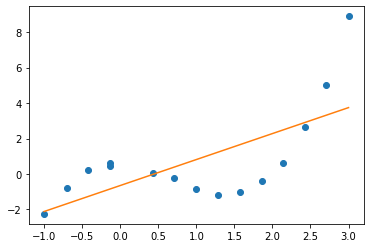

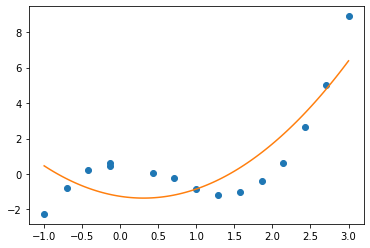

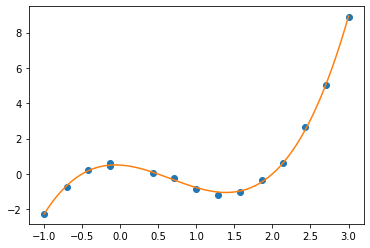

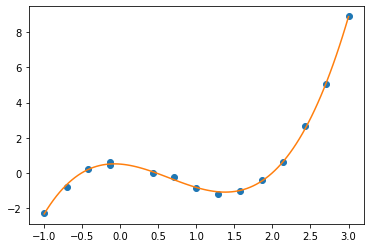

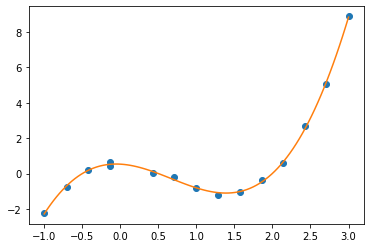

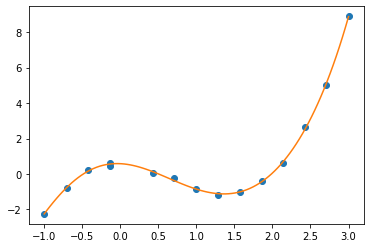

In [195]:
import matplotlib.pyplot as plt

#строим графики

for m in range(1,7):
    a = best_fit(x,y,m) #находим коэффициенты полинома
    
    x0 = np.linspace(-1, 3, 100)
    plt.figure()
    plt.plot(x,y, 'o', x0, [Function(a, i) for i in x0])
    plt.show()


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [196]:
def sigma(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    m = 0
    best_m = 0
    
    best_sigma = float('+inf') #искуственно создаем с чем будем сравнивать первый
    
    while m < n:
        m += 1
        sig = sum([(Function(best_fit(x,y,m), x[i]) - y[i])**2 for i in range(n)]) / (n - m)
        
        if sig < best_sigma:
            best_sigma = sig
            best_m = m
        
        else:
            break 
    return m

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

5


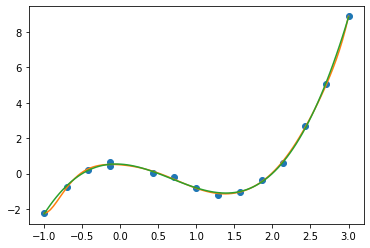

In [197]:
m0 = sigma(x, y)
print(m0)
m = 10
a = best_fit(x,y,m)
a0 = best_fit(x,y,m0)
plt.figure()
plt.plot(x,y ,'o', x0, [Function(a, i) for i in x0], x0, [Function(a0, i) for i in x0])
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [198]:
def QR_factorization(x, X, Y):
    Q, R = np.linalg.qr(X)
    Y_roll = Q.T @ Y
    return numpy.linalg.solve(R @ b - Y_roll[:len(R)])

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [199]:
def Lagrange(x, X, Y):
    
    X = np.asarray(X)
    Y = np.asarray(Y)
    m = len(X)
    def lag(k):
        l = 1
        for i in range(k):
            l *= (x - X[i]) / (X[k] - X[i])
            
        for i in range(k+1, m):
            l *= (x - X[i]) / (X[k] - X[i])
       
        return l
    
    L = 0
    for i in range(m):
        L += Y[i] * lag(i)
    return L

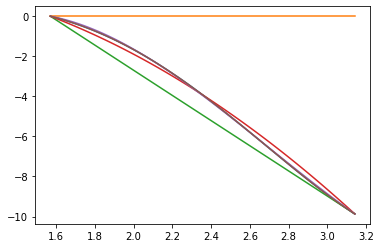

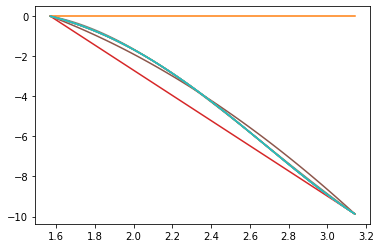

In [203]:
def F2(x):
    return np.cos(x) * x**2

x = np.linspace(np.pi / 2, np.pi, 100)

plt.figure()

plt.plot(x, [F2(i) for i in x])

for m in range(1, 6):
    X = np.linspace(np.pi / 2, np.pi, m)
    Y = [F2(i) for i in X]
    plt.plot(x, [Lagrange(i, X, Y) for i in x])
plt.show()



for m in range(1, 6):
    X = np.linspace(np.pi / 2, np.pi, m)
    Y = [F2(i) for i in X]
    plt.plot(x, [F2(i) for i in x])
    plt.plot(x, [Lagrange(i, X, Y) for i in x])
plt.show()



### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [204]:
def Chebyshev_nodes(start, stop, n):
    x = []
    middle = (start + stop) / 2
    length = (stop - start) / 2
  
    for i in range(1, n + 1):
        x.append(middle + length * (np.cos((2 * i - 1) * np.pi / (2 * n))))
    x = np.asarray(x)
    return x

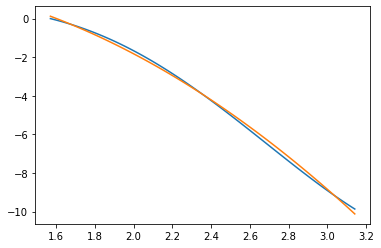

In [205]:
m = 3
X = Chebyshev_nodes(np.pi / 2, np.pi, m)

Y = [F2(i) for i in X]
plt.plot(x, [F2(i) for i in x])
plt.plot(x, [Lagrange(i, X, Y) for i in x])
plt.show()